# Mixed Layer Depth

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature


### Opening the files

In [3]:
temp_summer = xr.open_dataset("temp_summer.nc", decode_times=False)
temp_winter = xr.open_dataset("temp_winter.nc", decode_times=False)
salt_summer = xr.open_dataset("salt_summer.nc", decode_times=False)
salt_winter = xr.open_dataset("salt_winter.nc", decode_times=False)
density_summer = xr.open_dataset("density_summer.nc", decode_times=False)
density_winter = xr.open_dataset("density_winter.nc", decode_times=False)

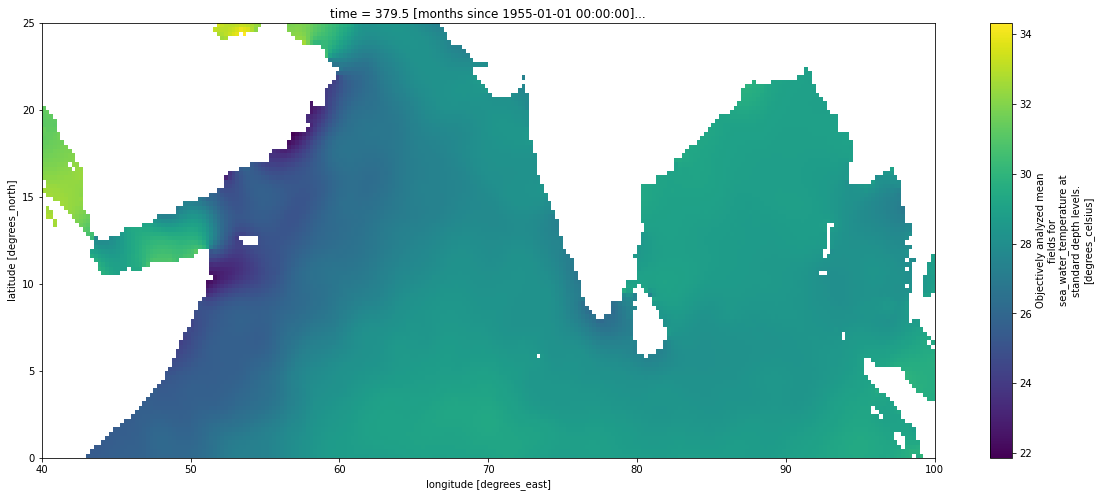

In [4]:
plt.figure(1, figsize=(20,8))
temp_summer["t_an"].isel(depth=0, time=0).plot()

## Summer 

### Criteria 1 : Temperature criteria

In [5]:
temp_summer = temp_summer["t_an"] ; temp_winter = temp_winter["t_an"]
temp_summer

<xarray.DataArray 't_an' (time: 1, depth: 102, lat: 100, lon: 240)>
[2448000 values with dtype=float32]
Coordinates:
  * time     (time) float32 379.5
  * lon      (lon) float32 40.12 40.38 40.62 40.88 ... 99.12 99.38 99.62 99.88
  * lat      (lat) float32 0.125 0.375 0.625 0.875 ... 24.12 24.38 24.62 24.88
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
Attributes:
    standard_name:  sea_water_temperature
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    units:          degrees_celsius
    cell_methods:   area: mean depth: mean time: mean within years time: mean...

In [6]:
mld_summer = temp_summer.isel(time=0,depth=2)

In [7]:
mld_summer

<xarray.DataArray 't_an' (lat: 100, lon: 240)>
[24000 values with dtype=float32]
Coordinates:
    time     float32 379.5
  * lon      (lon) float32 40.12 40.38 40.62 40.88 ... 99.12 99.38 99.62 99.88
  * lat      (lat) float32 0.125 0.375 0.625 0.875 ... 24.12 24.38 24.62 24.88
    depth    float32 10.0
Attributes:
    standard_name:  sea_water_temperature
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    units:          degrees_celsius
    cell_methods:   area: mean depth: mean time: mean within years time: mean...

In [8]:
for lat in range(len(temp_summer.lat)):
    for lon in range(len(temp_summer.lon)):
        for depth in range(0,40):
            if (abs(temp_summer[0,2,lat,lon] - temp_summer[0,depth,lat,lon]) <= 0.2):
                mld_summer[lat,lon] = temp_summer["depth"][depth]

In [9]:
mld_summer.max()

<xarray.DataArray 't_an' ()>
array(75.)
Coordinates:
    time     float32 379.5
    depth    float32 10.0

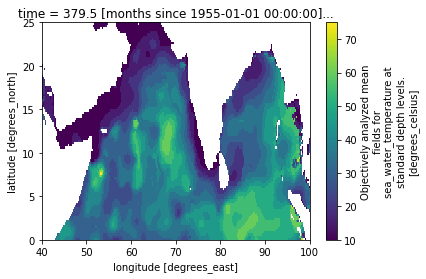

In [10]:
mld_summer.plot()

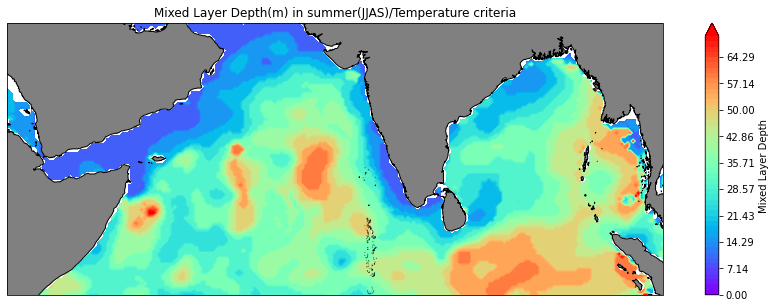

In [11]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=proj)
c = mld_summer.plot.contourf(
    x="lon", y="lat", transform=ccrs.PlateCarree(), levels=np.linspace(0,70,50), cmap="rainbow", add_colorbar=False
)
coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.5"
)
ax.add_feature(coast_10m)
plt.title("Mixed Layer Depth(m) in summer(JJAS)/Temperature criteria")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.colorbar(c, ax=ax, label="Mixed Layer Depth")


### Criteria 2 : Density(fixed) criteria

In [12]:
density_summer = density_summer["I_an"]; density_winter = density_winter["I_an"]

In [13]:
mld2_summer = density_summer.isel(time=0,depth=2)*0.0

In [14]:
for lat in range(len(density_summer.lat)):
    for lon in range(len(density_summer.lon)):
        for depth in range(0,40):
            if (abs(density_summer[0,depth,lat,lon] - density_summer[0,2,lat,lon]) <= 0.125):
                mld2_summer[lat,lon] = density_summer["depth"][depth]


In [15]:
mld2_summer

<xarray.DataArray 'I_an' (lat: 100, lon: 240)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time     float32 379.5
  * lon      (lon) float32 40.12 40.38 40.62 40.88 ... 99.12 99.38 99.62 99.88
  * lat      (lat) float32 0.125 0.375 0.625 0.875 ... 24.12 24.38 24.62 24.88
    depth    float32 10.0

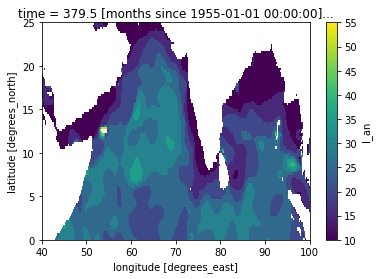

In [16]:
mld2_summer.plot()

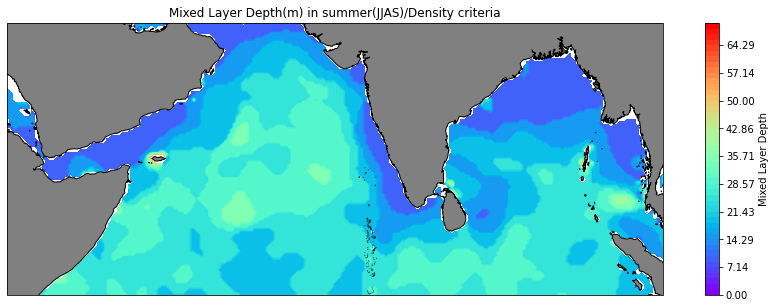

In [17]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=proj)
c = mld2_summer.plot.contourf(
    x="lon", y="lat", transform=ccrs.PlateCarree(), levels=np.linspace(0,70,50), cmap="rainbow", add_colorbar=False
)
coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.5"
)
ax.add_feature(coast_10m)
plt.title("Mixed Layer Depth(m) in summer(JJAS)/Density criteria")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.colorbar(c, ax=ax, label="Mixed Layer Depth")

### Barrier Layer Thickness

In [18]:
blt_summer = mld_summer - mld2_summer 

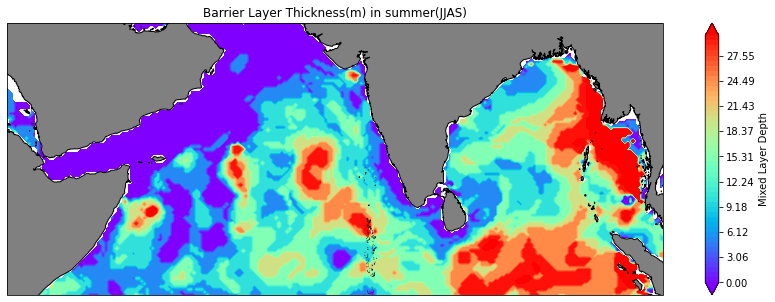

In [21]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=proj)
c = blt_summer.plot.contourf(
    x="lon", y="lat", transform=ccrs.PlateCarree(), levels=np.linspace(0,30,50), cmap="rainbow", add_colorbar=False
)
coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.5"
)
ax.add_feature(coast_10m)
plt.title("Barrier Layer Thickness(m) in summer(JJAS)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.colorbar(c, ax=ax, label="Mixed Layer Depth")

## Winter

### Criteria 1: Temperature criteria

In [23]:
temp_winter

<xarray.DataArray 't_an' (time: 1, depth: 102, lat: 100, lon: 240)>
[2448000 values with dtype=float32]
Coordinates:
  * time     (time) float32 373.5
  * lon      (lon) float32 40.12 40.38 40.62 40.88 ... 99.12 99.38 99.62 99.88
  * lat      (lat) float32 0.125 0.375 0.625 0.875 ... 24.12 24.38 24.62 24.88
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
Attributes:
    standard_name:  sea_water_temperature
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    units:          degrees_celsius
    cell_methods:   area: mean depth: mean time: mean within years time: mean...

In [24]:
mld_winter = temp_winter.isel(time=0,depth=2)

In [25]:
for lat in range(len(temp_winter.lat)):
    for lon in range(len(temp_winter.lon)):
        for depth in range(0,40):
            if (abs(temp_winter[0,2,lat,lon] - temp_winter[0,depth,lat,lon]) <= 0.2):
                mld_winter[lat,lon] = temp_winter["depth"][depth]

In [ ]:
mld_winter.max()

<xarray.DataArray 't_an' ()>
array(95.)
Coordinates:
    time     float32 373.5
    depth    float32 10.0

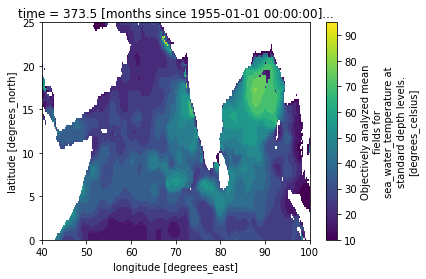

In [ ]:
mld_winter.plot()

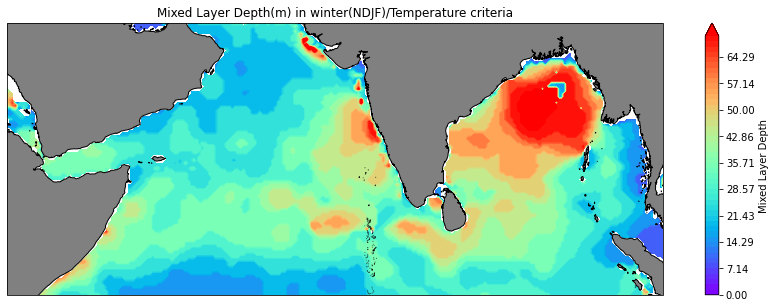

In [ ]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=proj)
c = mld_winter.plot.contourf(
    x="lon", y="lat", transform=ccrs.PlateCarree(), levels=np.linspace(0,70,50), cmap="rainbow", add_colorbar=False
)
coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.5"
)
ax.add_feature(coast_10m)
plt.title("Mixed Layer Depth(m) in winter(NDJF)/Temperature criteria")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.colorbar(c, ax=ax, label="Mixed Layer Depth")

### Criteria 2 : Density(fixed) criteria

In [ ]:
density_winter = density_winter["I_an"]

In [ ]:
mld2_winter = density_winter.isel(time=0,depth=2)*0.0

In [ ]:
for lat in range(len(density_winter.lat)):
    for lon in range(len(density_winter.lon)):
        for depth in range(0,40):
            if (abs(density_winter[0,depth,lat,lon] - density_winter[0,2,lat,lon]) <= 0.125):
                mld2_winter[lat,lon] = density_winter["depth"][depth]

In [ ]:
mld2_winter

<xarray.DataArray 'I_an' (lat: 100, lon: 240)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time     float32 373.5
  * lon      (lon) float32 40.12 40.38 40.62 40.88 ... 99.12 99.38 99.62 99.88
  * lat      (lat) float32 0.125 0.375 0.625 0.875 ... 24.12 24.38 24.62 24.88
    depth    float32 10.0

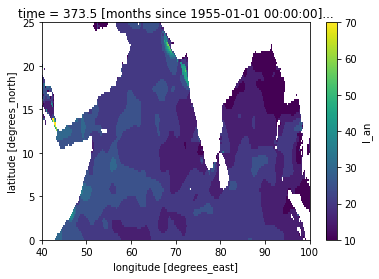

In [ ]:
mld2_winter.plot()

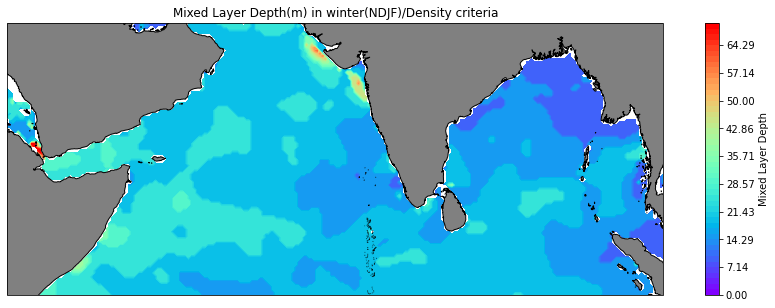

In [ ]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=proj)
c = mld2_winter.plot.contourf(
    x="lon", y="lat", transform=ccrs.PlateCarree(), levels=np.linspace(0,70,50), cmap="rainbow", add_colorbar=False
)
coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.5"
)
ax.add_feature(coast_10m)
plt.title("Mixed Layer Depth(m) in winter(NDJF)/Density criteria")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.colorbar(c, ax=ax, label="Mixed Layer Depth")

### Barrier Layer Thickness

In [ ]:
blt_winter = mld_winter - mld2_winter 

In [ ]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=proj)
c = blt_winter.plot.contourf(
    x="lon", y="lat", transform=ccrs.PlateCarree(), levels=np.linspace(0,20,50), cmap="rainbow", add_colorbar=False
)
coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.5"
)
ax.add_feature(coast_10m)
plt.title("Barrier Layer Thickness(m) in winter(NDJF)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.colorbar(c, ax=ax, label="Mixed Layer Depth")